### City of Toronto Operating Budget: Category and Sub Category Analysis

In [121]:
#(Running Aayush notebook for data cleaning: filename as "main")
%run main.ipynb

Null counts for 2019:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2019                 0
dtype: int64

Null counts for 2020:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2020                 0
dtype: int64

Null counts for 2021:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2021                 0
dtype: int64

Null counts for 2022:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2022                 0
dtype: int64

Null counts for 2023:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Catego

In [128]:
#Importing more dependancies

import requests
from scipy.stats import linregress
from scipy import stats
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [129]:
#Using the following dataframes as a base to derive all my analyis
#budget2019_df_exp
#budget2020_df_exp
#budget2021_df_exp
#budget2022_df_exp
#budget2023_df_exp 
#budget2019_df_rev
#budget2020_df_rev
#budget2021_df_rev
#budget2022_df_rev
#budget2023_df_rev

In [130]:
#Defining years for all calculation purposes
years = [2019, 2020, 2021, 2022, 2023]

In [131]:
#Converting the numeric last column to datatype "float" for all calculation purpose

# Organize DataFrames into lists
expense_dfs = [budget2019_df_exp, budget2020_df_exp, budget2021_df_exp, budget2022_df_exp, budget2023_df_exp]
revenue_dfs = [budget2019_df_rev, budget2020_df_rev, budget2021_df_rev, budget2022_df_rev, budget2023_df_rev]

# Column to convert
column_to_convert = 'Budgeted amount'

# Iterate over expense and revenue DataFrames
for dfs in [expense_dfs, revenue_dfs]:
    for year in range(2019, 2024):
        column_name = f'{column_to_convert} {year}'
        
        # Iterate over each DataFrame
        for df in dfs:
            # Check if the column exists before converting
            if column_name in df.columns:
                df[column_name] = pd.to_numeric(df[column_name], errors='coerce')


/var/folders/q3/539172213gv_lsmm8nv750l00000gn/T/ipykernel_28030/4265554678.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_numeric(df[column_name], errors='coerce')


In [132]:
# Define a function "divide_and_round_ak" to divide numbers by 10^6 and round to 3 decimal places
#this function will be used throughout the analyis, in case any conversion required
divide_and_round_ak = lambda x: round(float(x) / 1e6, 2) if pd.to_numeric(x, errors='coerce') == x else str(x)


# Category wise Expense Analysis

In [133]:
##Calculating Category wise total budget amount and storing it in DataFrame

#Create an empty list to store DataFrames for each year
category_dfs_ak_exp = []

#Iterating it through all years
for year in years:
    budget_df_exp = globals()[f"budget{year}_df_exp"]
    category_df_exp = budget_df_exp.groupby("Category Name")[f"Budgeted amount {year}"].sum().reset_index()
    category_dfs_ak_exp.append(category_df_exp)

In [134]:
##Merging the Category wise Expense Amount Dataframe to a single Dataframe

# Merge category_df_2019_ak_exp and category_df_2020_ak_exp on "Category Name"
merged_df_ak_exp = pd.merge(category_dfs_ak_exp[0], category_dfs_ak_exp[1], on="Category Name", how="outer")

# Merge the result with category_df_2021_ak_exp on "Category Name"
merged_df_ak_exp = pd.merge(merged_df_ak_exp, category_dfs_ak_exp[2], on="Category Name", how="outer")

# Merge the result with category_df_2022_ak_exp on "Category Name"
merged_df_ak_exp = pd.merge(merged_df_ak_exp, category_dfs_ak_exp[3], on="Category Name", how="outer")

# Merge the result with category_df_2023_ak_exp on "Category Name"
merged_df_ak_exp = pd.merge(merged_df_ak_exp, category_dfs_ak_exp[4], on="Category Name", how="outer")

merged_df_ak_exp

,Category Name,Budgeted amount 2019,Budgeted amount 2020,Budgeted amount 2021,Budgeted amount 2022,Budgeted amount 2023
0,Contribution To Capital,343453500.00,343455500.00,349535000.00,347758988.00,345487500.00
1,Contribution To Reserves/Reserve Funds,1374325784.71,1492208087.20,1569495249.51,679057175.84,817736269.53
2,Equipment,62569124.00,63055638.89,63056757.49,69628701.08,74919605.00
3,Inter-Divisional Charges,316148509.88,156994846.31,NaN,312478065.27,319734336.04
4,Materials & Supplies,735022845.38,734463757.64,813279354.06,810374856.79,839363612.67
5,Other Expenditures,2711141798.57,2611534040.61,2835059507.45,2776242797.51,3063180745.15
6,Salaries And Benefits,5928045875.11,6092480750.72,NaN,NaN,NaN
7,Service And Rent,2082852975.25,2178261693.14,2342039645.22,2632925274.27,3071138218.05
8,Benefits,NaN,NaN,1450706345.65,1488014338.80,1586109618.61
9,Salaries,NaN,NaN,4781880711.32,5108579678.97,5313474748.37


In [135]:
# Rounding off the Expense amount to millions (10^6)

# Apply the division and rounding function to all columns in the DataFrame
merged_df_ak_final_exp = merged_df_ak_exp.applymap(divide_and_round_ak)

#Renaming the column as Expense and year
merged_df_ak_final_exp=merged_df_ak_final_exp.rename(columns={
      "Category Name":"Category Name",
      "Budgeted amount 2019":"Expense 2019(millions)",
      "Budgeted amount 2020":"Expense 2020(millions)",
      "Budgeted amount 2021":"Expense 2021(millions)",
      "Budgeted amount 2022":"Expense 2022(millions)",
      "Budgeted amount 2023":"Expense 2023(millions)"
    
})
merged_df_ak_final_exp

,Category Name,Expense 2019(millions),Expense 2020(millions),Expense 2021(millions),Expense 2022(millions),Expense 2023(millions)
0,Contribution To Capital,343.45,343.46,349.54,347.76,345.49
1,Contribution To Reserves/Reserve Funds,1374.33,1492.21,1569.50,679.06,817.74
2,Equipment,62.57,63.06,63.06,69.63,74.92
3,Inter-Divisional Charges,316.15,156.99,nan,312.48,319.73
4,Materials & Supplies,735.02,734.46,813.28,810.37,839.36
5,Other Expenditures,2711.14,2611.53,2835.06,2776.24,3063.18
6,Salaries And Benefits,5928.05,6092.48,nan,nan,nan
7,Service And Rent,2082.85,2178.26,2342.04,2632.93,3071.14
8,Benefits,nan,nan,1450.71,1488.01,1586.11
9,Salaries,nan,nan,4781.88,5108.58,5313.47


In [136]:
##Data Cleaning for above Expense Dataframe

# Replace 'nan' strings with actual NaN values
merged_df_ak_final_exp.replace('nan', pd.NA, inplace=True)

# Replace NaN values with 0
merged_df_ak_final_exp.fillna(0, inplace=True)

# Adding Salaries And Benefits for year 2021,2022,2023 and assigning this sum to "Salaries And Benefits"
salaries_2021_exp = merged_df_ak_final_exp.loc[merged_df_ak_final_exp['Category Name'].isin(['Salaries', 'Benefits']), 'Expense 2021(millions)'].sum()
salaries_2022_exp = merged_df_ak_final_exp.loc[merged_df_ak_final_exp['Category Name'].isin(['Salaries', 'Benefits']), 'Expense 2022(millions)'].sum()
salaries_2023_exp = merged_df_ak_final_exp.loc[merged_df_ak_final_exp['Category Name'].isin(['Salaries', 'Benefits']), 'Expense 2023(millions)'].sum()

# Update the "Salaries And Benefits" column from above value for year 2021,2022,2023
merged_df_ak_final_exp.loc[merged_df_ak_final_exp['Category Name'] == 'Salaries And Benefits', 'Expense 2021(millions)'] = salaries_2021_exp
merged_df_ak_final_exp.loc[merged_df_ak_final_exp['Category Name'] == 'Salaries And Benefits', 'Expense 2022(millions)'] = salaries_2022_exp
merged_df_ak_final_exp.loc[merged_df_ak_final_exp['Category Name'] == 'Salaries And Benefits', 'Expense 2023(millions)'] = salaries_2023_exp

#Drop the last two columns since the value was already aaded up in column no 6
merged_df_ak_final_exp=merged_df_ak_final_exp.drop([8,9])
merged_df_ak_final_exp

,Category Name,Expense 2019(millions),Expense 2020(millions),Expense 2021(millions),Expense 2022(millions),Expense 2023(millions)
0,Contribution To Capital,343.45,343.46,349.54,347.76,345.49
1,Contribution To Reserves/Reserve Funds,1374.33,1492.21,1569.50,679.06,817.74
2,Equipment,62.57,63.06,63.06,69.63,74.92
3,Inter-Divisional Charges,316.15,156.99,0.00,312.48,319.73
4,Materials & Supplies,735.02,734.46,813.28,810.37,839.36
5,Other Expenditures,2711.14,2611.53,2835.06,2776.24,3063.18
6,Salaries And Benefits,5928.05,6092.48,6232.59,6596.59,6899.58
7,Service And Rent,2082.85,2178.26,2342.04,2632.93,3071.14


In [137]:
##Adding all categories indivisually year wise and 
##sorting it based on total, so that highest expense category is on top

# Extract the non-numeric columns (assuming the first column is non-numeric)
non_numeric_columns = merged_df_ak_final_exp.columns[1:]

# Convert non-numeric values to NaN and then sum each row
merged_df_ak_final_exp['Total'] = merged_df_ak_final_exp[non_numeric_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Sort the DataFrame based on the "Total" column in descending order
merged_df_ak_final_exp = merged_df_ak_final_exp.sort_values("Total", ascending=False)

# Display the updated and sorted DataFrame
merged_df_ak_final_exp=merged_df_ak_final_exp.drop(['Total'], axis=1)

merged_df_ak_final_exp

,Category Name,Expense 2019(millions),Expense 2020(millions),Expense 2021(millions),Expense 2022(millions),Expense 2023(millions)
6,Salaries And Benefits,5928.05,6092.48,6232.59,6596.59,6899.58
5,Other Expenditures,2711.14,2611.53,2835.06,2776.24,3063.18
7,Service And Rent,2082.85,2178.26,2342.04,2632.93,3071.14
1,Contribution To Reserves/Reserve Funds,1374.33,1492.21,1569.50,679.06,817.74
4,Materials & Supplies,735.02,734.46,813.28,810.37,839.36
0,Contribution To Capital,343.45,343.46,349.54,347.76,345.49
3,Inter-Divisional Charges,316.15,156.99,0.00,312.48,319.73
2,Equipment,62.57,63.06,63.06,69.63,74.92


In [138]:
##Analysing the year wise total expense(in million)

#Calculation the sum of expenses for the year
total_2019_ak_exp = merged_df_ak_final_exp["Expense 2019(millions)"].sum()
total_2020_ak_exp = merged_df_ak_final_exp["Expense 2020(millions)"].sum()
total_2021_ak_exp = merged_df_ak_final_exp["Expense 2021(millions)"].sum()
total_2022_ak_exp = merged_df_ak_final_exp["Expense 2022(millions)"].sum()
total_2023_ak_exp = merged_df_ak_final_exp["Expense 2023(millions)"].sum()

# Create a DataFrame with the totals
total_df_ak_exp = pd.DataFrame([
    {"Year": "2019", "Total Expense(millions)": total_2019_ak_exp},
    {"Year": "2020", "Total Expense(millions)": total_2020_ak_exp},
    {"Year": "2021", "Total Expense(millions)": total_2021_ak_exp},
    {"Year": "2022", "Total Expense(millions)": total_2022_ak_exp},
    {"Year": "2023", "Total Expense(millions)": total_2023_ak_exp}
])

# Calculate percentage change by each year
total_df_ak_exp["Percentage Change"] = round(total_df_ak_exp["Total Expense(millions)"].pct_change() * 100,2)

# Set index as Year and display DataFrame
total_df_ak_exp = total_df_ak_exp.set_index("Year")
total_df_ak_exp

,Total Expense(millions),Percentage Change
Year,,
2019,13553.56,NaN
2020,13672.45,0.88
2021,14205.07,3.90
2022,14225.06,0.14
2023,15431.14,8.48


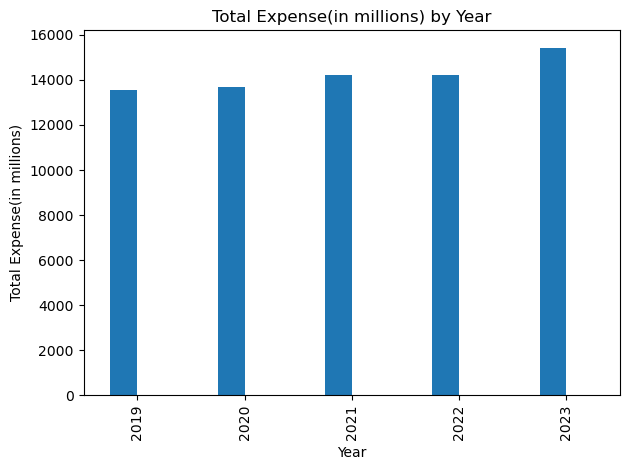

<Figure size 640x480 with 0 Axes>

In [139]:
##Bar graph to show yearly change in expense during five years

# Create a bar plot
graph1_ak_exp = total_df_ak_exp.plot(kind="bar", legend=False)

# Set plot title and labels
plt.title("Total Expense(in millions) by Year")
plt.xlabel("Year")
plt.ylabel("Total Expense(in millions)")
plt.tight_layout()
plt.show()

#Saving the image in the output folder
plt.savefig('output/Category Analysis/total_expense(in millions)_vs_year_plot.png')

In [140]:
##Calculating the percentage share yearwise,for each category
##This code has been modified from a similar code from google

#Define dataframe to hold the percentage values
percent_df_ak_exp = pd.DataFrame() 

#Converting the first coloumn to numeric for calculation purpose
index_as_int_exp = total_df_ak_exp.index.astype(int)

#Iterting through the years
for year in years:
        percent_df_ak_exp[f"{year}"] = round(
            (merged_df_ak_final_exp[f"Expense {year}(millions)"] / total_df_ak_exp.iloc[int(year) - index_as_int_exp.min(), total_df_ak_exp.columns.get_loc('Total Expense(millions)')]) * 100, 2
        )

# Add 'Category Name' to the DataFrame at the beginning
percent_df_ak_exp.insert(0, 'Category Name', merged_df_ak_final_exp['Category Name'])

percent_df_ak_exp

,Category Name,2019,2020,2021,2022,2023
6,Salaries And Benefits,43.74,44.56,43.88,46.37,44.71
5,Other Expenditures,20.00,19.10,19.96,19.52,19.85
7,Service And Rent,15.37,15.93,16.49,18.51,19.90
1,Contribution To Reserves/Reserve Funds,10.14,10.91,11.05,4.77,5.30
4,Materials & Supplies,5.42,5.37,5.73,5.70,5.44
0,Contribution To Capital,2.53,2.51,2.46,2.44,2.24
3,Inter-Divisional Charges,2.33,1.15,0.00,2.20,2.07
2,Equipment,0.46,0.46,0.44,0.49,0.49


In [141]:
##Highest Expense Category for each year

#Create empty list to hold dataframe for each year highest expense category
max_values_ak_exp = []
category_names_ak_exp_max = []

#Iterating through years to get max value and name
for year in years:
    max_value_ak_exp = merged_df_ak_final_exp[f"Expense {year}(millions)"].max()
    category_name_ak_exp_max = merged_df_ak_final_exp.loc[merged_df_ak_final_exp[f"Expense {year}(millions)"].idxmax(), "Category Name"]
    
    max_values_ak_exp.append(max_value_ak_exp)
    category_names_ak_exp_max.append(category_name_ak_exp_max)

#Creating max value dataframe
high_df_ak_exp = pd.DataFrame({
    "Year": years,
    "Highest Category": category_names_ak_exp_max,
    "Expense Amount": max_values_ak_exp
})

# Since the highest expense category is same
#Calculating percentage change by each category through each year
high_df_ak_exp["Percentage Change"] = round(high_df_ak_exp["Expense Amount"].pct_change() * 100,2)
high_df_ak_exp

,Year,Highest Category,Expense Amount,Percentage Change
0,2019,Salaries And Benefits,5928.05,NaN
1,2020,Salaries And Benefits,6092.48,2.77
2,2021,Salaries And Benefits,6232.59,2.30
3,2022,Salaries And Benefits,6596.59,5.84
4,2023,Salaries And Benefits,6899.58,4.59


In [142]:
##Lowest Expense Category for each year

#Filtering the value which are NaN or 0 (since these values are not to be counted for lowest category)
filtered_df_ak_exp = merged_df_ak_final_exp.copy()
filtered_df_ak_exp.replace(0, np.nan, inplace=True)

#Create empty list to hold dataframe for each year highest expense category
min_values_ak_exp = []
category_names_ak_exp_min = []

#Iterating through years to get min value and name
for year in years:
    min_value_ak_exp = filtered_df_ak_exp[f"Expense {year}(millions)"].min()
    category_name_ak_exp_min = filtered_df_ak_exp.loc[filtered_df_ak_exp[f"Expense {year}(millions)"].idxmin(), "Category Name"]

    min_values_ak_exp.append(min_value_ak_exp)
    category_names_ak_exp_min.append(category_name_ak_exp_min)

#Creating min value dataframe
low_df_ak_exp = pd.DataFrame({
    "Year": years,
    "Lowest Category": category_names_ak_exp_min,
    "Expense Amount": min_values_ak_exp
})
# Since the lowest expense category is same
#Calculating percentage change by each category through each year
low_df_ak_exp["Percentage Change"] = round(low_df_ak_exp["Expense Amount"].pct_change() * 100,2)
low_df_ak_exp

,Year,Lowest Category,Expense Amount,Percentage Change
0,2019,Equipment,62.57,NaN
1,2020,Equipment,63.06,0.78
2,2021,Equipment,63.06,0.00
3,2022,Equipment,69.63,10.42
4,2023,Equipment,74.92,7.60


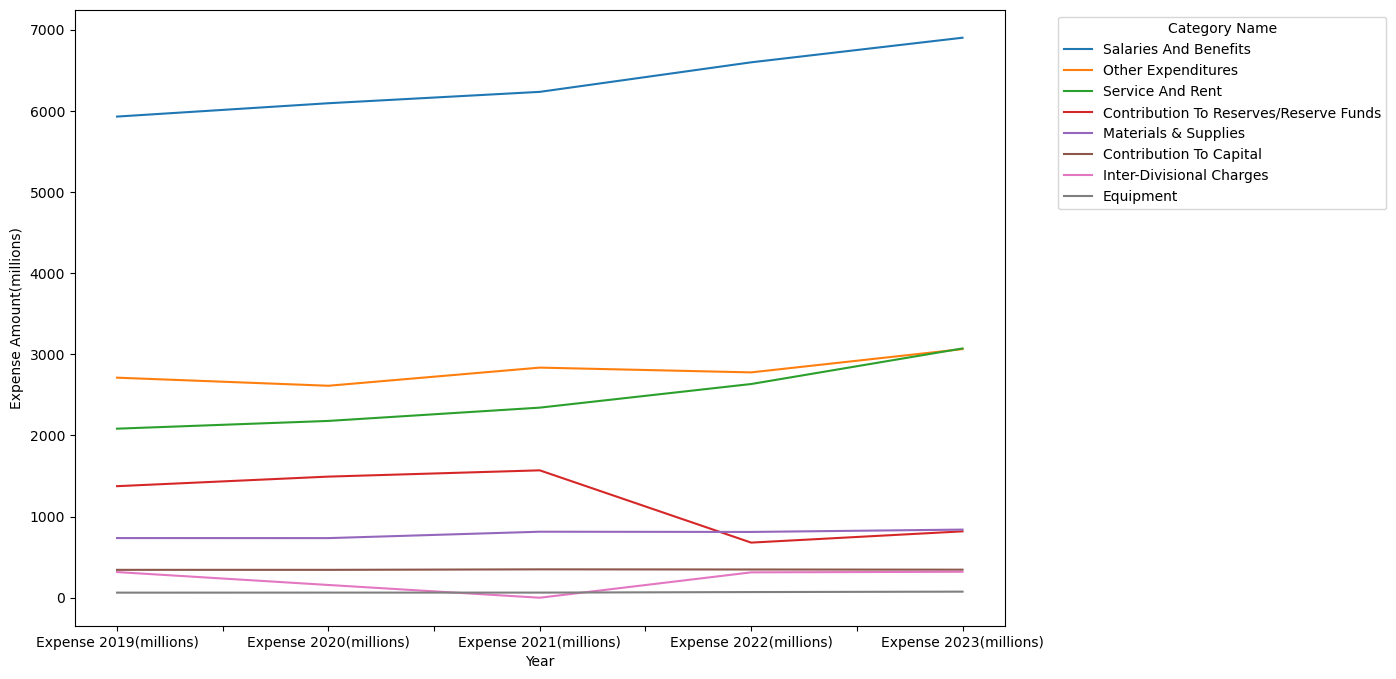

In [143]:
##Time series data of expense amount over the years for different categories
time_series_data = merged_df_ak_final_exp.set_index('Category Name').T
time_series_data.plot(figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Expense Amount(millions)')
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('output/Category Analysis/time_series_data_for_expense_five_years.png')
plt.show()

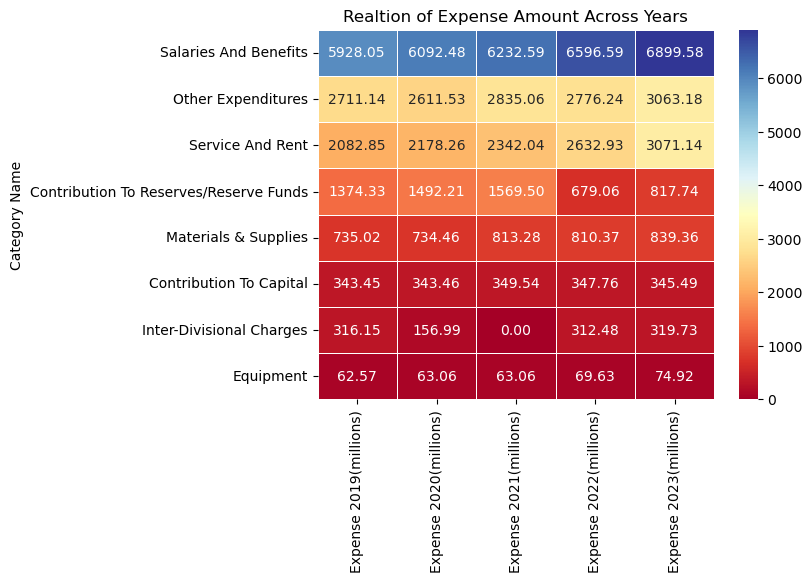

In [144]:
##Realtionship between "Years" and "Expense Amount Categories" using seaborn heatmap

merged_df_ak_final_exp_heat=merged_df_ak_final_exp.set_index("Category Name")

# Plot heatmap
sns.heatmap(merged_df_ak_final_exp_heat, annot=True, fmt=".2f",cmap='RdYlBu', linewidths=.5)
plt.title("Realtion of Expense Amount Across Years")
plt.savefig('output/Category Analysis/Correlation_matrix_of_Expense_Amount.png')
plt.show()

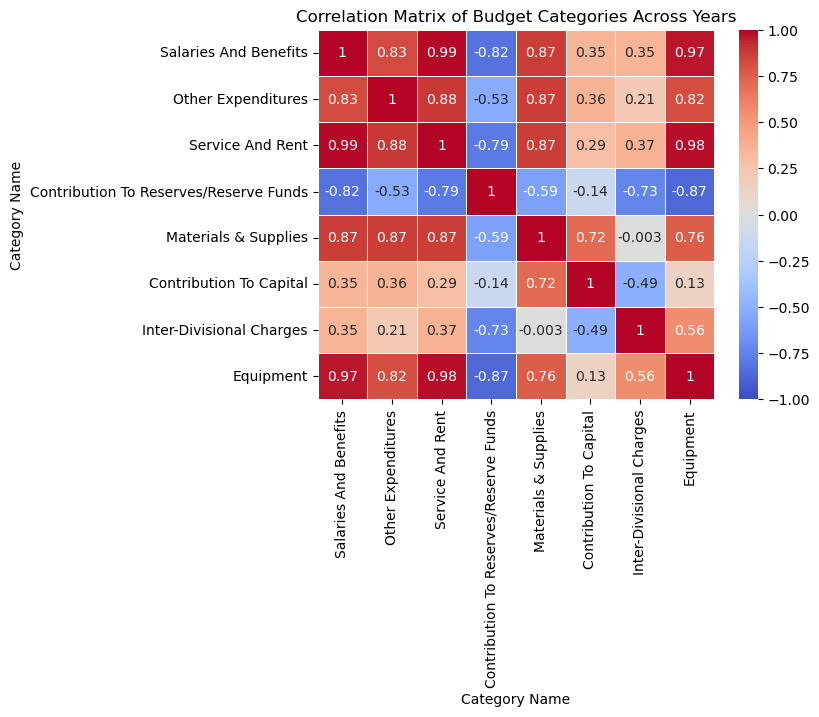

In [145]:
##Correlation matrix of budget categories across different years

# Transpose the DataFrame so that categories are rows and years are columns
transposed_df = merged_df_ak_final_exp.set_index('Category Name').T

# Calculate the correlation matrix
correlation_matrix = transposed_df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5,vmin=-1,vmax=1)
plt.title("Correlation Matrix of Budget Categories Across Years")
plt.savefig('output/Category Analysis/Correlation_Matrix_of_Budget_Categories_Across_Years.png')
plt.show()

# Analysing ten years expense data for Line of Regression

In [149]:
##Linear Regression Between Salaries and Benefits over Years

#Analysing ten years data here
#Reading data from downloaded excel files

budget_path_2014 = Path("Resources/approved-operating-budget-summary-2014.xlsx") #2014
budget2014_df = pd.read_excel(budget_path_2014, sheet_name='2014')
budget_path_2015 = Path("Resources/approved-operating-budget-summary-2015.xlsx") #2015
budget2015_df = pd.read_excel(budget_path_2015, sheet_name='summary')
budget_path_2016 = Path("Resources/approved-operating-budget-summary-2016.xlsx") #2016
budget2016_df = pd.read_excel(budget_path_2016, sheet_name='Open Data Summary')
budget_path_2017 = Path("Resources/approved-operating-budget-summary-2017.xlsx") #2017
budget2017_df = pd.read_excel(budget_path_2017, sheet_name='2017')
budget_path_2018 = Path("Resources/approved-operating-budget-summary-2018.xlsx") #2018
budget2018_df = pd.read_excel(budget_path_2018, sheet_name='Open Data')

#Renaming the columns
budget2014_df.rename(columns={2014.0: 'Budgeted amount 2014'}, inplace=True)
budget2015_df.rename(columns={2015.0: 'Budgeted amount 2015'}, inplace=True)
budget2016_df = budget2016_df.rename(columns={budget2016_df.columns[4]: "Budgeted amount 2016"})
budget2017_df.rename(columns={2017.0: 'Budgeted amount 2017'}, inplace=True)
budget2018_df.rename(columns={2018.0: 'Budgeted amount 2018'}, inplace=True)


#Categorising between expense and revenue DataFrame
budget2014_df_exp = budget2014_df[budget2014_df['Expense/Revenue']=='Expenses']
budget2014_df_rev = budget2014_df[budget2014_df['Expense/Revenue']=='Revenues']
budget2015_df_exp = budget2015_df[budget2015_df['Expense/Revenue']=='Expenses']
budget2015_df_rev = budget2015_df[budget2015_df['Expense/Revenue']=='Revenues']
budget2016_df_exp = budget2016_df[budget2016_df['Expense/Revenue']=='Expenses']
budget2016_df_rev = budget2016_df[budget2016_df['Expense/Revenue']=='Revenues']
budget2017_df_exp = budget2017_df[budget2017_df['Expense/Revenue']=='Expenses']
budget2017_df_rev = budget2017_df[budget2017_df['Expense/Revenue']=='Revenues']
budget2018_df_exp = budget2018_df[budget2018_df['Expense/Revenue']=='Expenses']
budget2018_df_rev = budget2018_df[budget2018_df['Expense/Revenue']=='Revenues']

/Users/anuradhakishore/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [150]:
##Linear Regression Between Salaries and Benefits over Years

#Defining the new ten year for calculation
years2 = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Initialize an empty dictionary to store the results
ak_values_exp = {}

# Iterate over the years
for year in years2:
    # Construct the DataFrame variable name
    df_variable_name = f"budget{year}_df_exp"
    
    # Check if the DataFrame variable exists
    if df_variable_name in locals():
        # Use the DataFrame variable to calculate the sum
        if year in (2021, 2022, 2023):  # if these years then we will need to add two separte rows to get the result
            ak_value_exp = round(locals()[df_variable_name][(locals()[df_variable_name]["Category Name"] == "Salaries") | (locals()[df_variable_name]["Category Name"] == "Benefits")][f"Budgeted amount {year}"].sum() / 1000000, 2)
        else:
            ak_value_exp = round(locals()[df_variable_name][(locals()[df_variable_name]["Category Name"] == "Salaries And Benefits")][f"Budgeted amount {year}"].sum() / 1000000, 2)
        
        # Store the result in the dictionary
        ak_values_exp[f"ak_{year}"] = ak_value_exp
print("Salary and Benfits in Ten years(in millions CAD)")
# Display the results
for key, value in ak_values_exp.items():
    print(f"{key}: {value}")

Salary and Benfits in Ten years(in millions CAD)
ak_2014: 5088.15
ak_2015: 5306.23
ak_2016: 5442.21
ak_2017: 5526.44
ak_2018: 5688.31
ak_2019: 5928.05
ak_2020: 6092.48
ak_2021: 6232.59
ak_2022: 6596.59
ak_2023: 6899.58


Round R-squared value is 0.97
Linear Regression: 189.24x + -376107.61


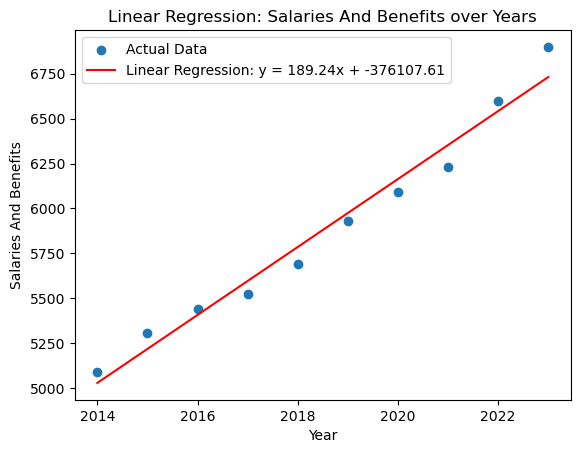

In [151]:
##Linear Regression Between Salaries and Benefits over Years

salaries_and_benefits_data = list(ak_values_exp.values())

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(years2, salaries_and_benefits_data)

# Create the regression line
regress_values = [slope * year + intercept for year in years2]

# Plot the data and regression line
plt.scatter(years2, salaries_and_benefits_data, label='Actual Data', marker='o')
plt.plot(years2, regress_values, label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}', color="red")

# Add labels and legend
plt.title('Linear Regression: Salaries And Benefits over Years')
plt.xlabel('Year')
plt.ylabel('Salaries And Benefits')
plt.legend()
print(f"Round R-squared value is {round(r_value**2, 2)}")
print(f'Linear Regression: {slope:.2f}x + {intercept:.2f}')

# Show the plot
plt.savefig('output/Category Analysis/Linear_Regression_Salaries_And_Benefits_over_Years.png')
plt.show()

# Analysing Sub Categories

In [152]:
#List sub category for all years(2019-2023)
print("Year 2019")
print(budget2019_df_exp["Sub-Category Name"].unique())
print("--------------------------------------------------------------------------------------")
print("Year 2020")
print(budget2019_df_exp["Sub-Category Name"].unique())
print("--------------------------------------------------------------------------------------")
print("Year 2021")
print(budget2019_df_exp["Sub-Category Name"].unique())
print("--------------------------------------------------------------------------------------")
print("Year 2022")
print(budget2019_df_exp["Sub-Category Name"].unique())
print("--------------------------------------------------------------------------------------")
print("Year 2023")
print(budget2019_df_exp["Sub-Category Name"].unique())
print("--------------------------------------------------------------------------------------")

Year 2019
['Allowances' 'Benefits' 'Gapping' 'Permanent Salaries' 'Food & Beverage'
 'Materials' 'Office Supplies' 'Supplies' 'Computes' 'Business Travel'
 'Conference' 'Contracted Services' 'General Travel' 'Meetings' 'Postage'
 'Repair & Maintenance' 'Services' 'Telecommnuncation' 'Training'
 'Contribution To Reserves/Reserve Funds' 'Inter-Divisional Charges'
 'Disability' 'Part Time Salaries' 'Energy' 'Medical Supplies' 'Equipment'
 'Furn & Fixtures' 'Professtional & Consulting' 'Rentals' 'Taxes Realty'
 'Zero Based Consulting' 'Contributions And Transfers'
 'Miscellaneous Expenditures' 'Contribution To Capital' 'Casual Salaries'
 'Commodities' 'Insurance' 'Parts' 'Chemicals' 'Temporary Salaries'
 'Construction Materials' 'Salt' 'Craft Trades Salaries' 'Other'
 'Vehicles' 'Debt Charges' 'Tax Write Offs']
--------------------------------------------------------------------------------------
Year 2020
['Allowances' 'Benefits' 'Gapping' 'Permanent Salaries' 'Food & Beverage'
 'Material

In [153]:
# Function to calculate max, min, and sorted DataFrames for a given year

def process_year_exp(budget_df_exp, year):
    sub_ak_exp = budget_df_exp.groupby(["Category Name", "Sub-Category Name"])[f"Budgeted amount {year}"].sum().reset_index()
    max_row_ak_exp = sub_ak_exp.loc[sub_ak_exp[f"Budgeted amount {year}"].idxmax()]
    min_row_ak_exp = sub_ak_exp.loc[sub_ak_exp[f"Budgeted amount {year}"].idxmin()]
    sort_ak_exp = sub_ak_exp.sort_values(f"Budgeted amount {year}", ascending=False)

    # Divide the 'Budgeted amount' columns by 10^6 and round to two decimal places
    sub_ak_exp[f"Budgeted amount {year}"] = round(sub_ak_exp[f"Budgeted amount {year}"] / 1e6, 2)
    max_row_ak_exp[f"Budgeted amount {year}"] = round(max_row_ak_exp[f"Budgeted amount {year}"] / 1e6, 2)
    min_row_ak_exp[f"Budgeted amount {year}"] = round(min_row_ak_exp[f"Budgeted amount {year}"] / 1e6, 2)
    sort_ak_exp[f"Budgeted amount {year}"] = round(sort_ak_exp[f"Budgeted amount {year}"] / 1e6, 2)

    # Store the results in a dictionary
    results = {
        f"max_row_ak_{year}_exp": max_row_ak_exp,
        f"min_row_ak_{year}_exp": min_row_ak_exp,
        f"sort_ak_{year}_exp": sort_ak_exp
    }

    return results

# Process each year
for year in years:
    # Assuming budget{year}_df_exp is your DataFrame for the corresponding year
    year_results = process_year_exp(globals()[f"budget{year}_df_exp"], year)

    # Print results for each year
    print(f"Year {year}: Maximum Expense in Sub-Category along with Category Name and Expense Amount(in Millions CAD)")
    print(year_results[f"max_row_ak_{year}_exp"])
    print("--------------------------------------------------------------------------------------")

    print(f"Year {year}: Minimum Expense in Sub-Category along with Category Name and Expense Amount (in Millions CAD)")
    print(year_results[f"min_row_ak_{year}_exp"])
    print("--------------------------------------------------------------------------------------")

Year 2019: Maximum Expense in Sub-Category along with Category Name and Expense Amount(in Millions CAD)
Category Name           Salaries And Benefits
Sub-Category Name          Permanent Salaries
Budgeted amount 2019                  4565.81
Name: 30, dtype: object
--------------------------------------------------------------------------------------
Year 2019: Minimum Expense in Sub-Category along with Category Name and Expense Amount (in Millions CAD)
Category Name           Salaries And Benefits
Sub-Category Name                     Gapping
Budgeted amount 2019                  -195.68
Name: 27, dtype: object
--------------------------------------------------------------------------------------
Year 2020: Maximum Expense in Sub-Category along with Category Name and Expense Amount(in Millions CAD)
Category Name           Salaries And Benefits
Sub-Category Name          Permanent Salaries
Budgeted amount 2020                  4704.52
Name: 30, dtype: object
---------------------------

/var/folders/q3/539172213gv_lsmm8nv750l00000gn/T/ipykernel_28030/4015467115.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_row_ak_exp[f"Budgeted amount {year}"] = round(max_row_ak_exp[f"Budgeted amount {year}"] / 1e6, 2)
/var/folders/q3/539172213gv_lsmm8nv750l00000gn/T/ipykernel_28030/4015467115.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_row_ak_exp[f"Budgeted amount {year}"] = round(min_row_ak_exp[f"Budgeted amount {year}"] / 1e6, 2)
/var/folders/q3/539172213gv_lsmm8nv750l00000gn/T/ipykernel_28030/4015467115.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

# Analysing Revenue

In [154]:
#Coverting all negative values to positive: only for calculation purpose
#this code has been transformed from google sources

numeric_columns = budget2019_df_rev.select_dtypes(include='number')
budget2019_df_rev.loc[:, numeric_columns.columns] = budget2019_df_rev.loc[:, numeric_columns.columns].abs()

numeric_columns = budget2020_df_rev.select_dtypes(include='number')
budget2020_df_rev.loc[:, numeric_columns.columns] = budget2020_df_rev.loc[:, numeric_columns.columns].abs()

numeric_columns = budget2021_df_rev.select_dtypes(include='number')
budget2021_df_rev.loc[:, numeric_columns.columns] = budget2021_df_rev.loc[:, numeric_columns.columns].abs()

numeric_columns = budget2022_df_rev.select_dtypes(include='number')
budget2022_df_rev.loc[:, numeric_columns.columns] = budget2022_df_rev.loc[:, numeric_columns.columns].abs()

numeric_columns = budget2023_df_rev.select_dtypes(include='number')
budget2023_df_rev.loc[:, numeric_columns.columns] = budget2023_df_rev.loc[:, numeric_columns.columns].abs()

In [155]:
##Calculating Category wise total Revenue amount and storing it in DataFrame

# Create an empty dictionary to store DataFrames for each year based on Category and Revenue Amount
category_dfs_ak_rev = []


#Iterating for storing all revenue amount data in a new dataframe
for year in years:
    budget_df_rev = globals()[f"budget{year}_df_rev"]
    category_df_rev = budget_df_rev.groupby("Category Name")[f"Budgeted amount {year}"].sum().reset_index()
    category_dfs_ak_rev.append(category_df_rev)
    

#Merging all the revenue data into a single dataframe

# Merge Year 2019 and Year 2020 on "Category Name"
merged_df_ak_rev = pd.merge(category_dfs_ak_rev[0], category_dfs_ak_rev[1], on="Category Name", how="outer")

# Merge Year 2019 and Year 2020 on "Category Name"
merged_df_ak_rev = pd.merge(merged_df_ak_rev, category_dfs_ak_rev[2], on="Category Name", how="outer")

# Merge Year 2019 and Year 2020 on "Category Name"
merged_df_ak_rev = pd.merge(merged_df_ak_rev, category_dfs_ak_rev[3], on="Category Name", how="outer")

# Merge Year 2019 and Year 2020 on "Category Name"
merged_df_ak_rev = pd.merge(merged_df_ak_rev, category_dfs_ak_rev[4], on="Category Name", how="outer")

merged_df_ak_rev


,Category Name,Budgeted amount 2019,Budgeted amount 2020,Budgeted amount 2021,Budgeted amount 2022,Budgeted amount 2023
0,Contribution From Reserves/Reserve Funds,541671608.66,523080194.04,526776815.93,612602667.09,726076415.22
1,Federal Subsidies,214313608.25,251397726.15,288350822.41,287581971.42,915504172.81
2,Inter-Divisional Recoveries,316148550.16,157281829.09,NaN,312478067.87,319734333.54
3,Licences & Permits Revenue,138986399.62,141642885.05,NaN,NaN,NaN
4,Other Subsidies,8450810.00,18138210.00,NaN,NaN,NaN
5,Provincial Subsidies,2420081610.79,2222765189.88,3847996461.06,3805709326.87,3357878530.99
6,Sundry and Other Revenues,7322784723.06,7630285778.89,NaN,NaN,NaN
7,Transfers From Capital,206958379.84,278811620.81,192354358.19,207187857.59,229767014.42
8,User Fees & Donations,2384165039.47,2449051070.48,1624933333.59,1973688583.20,2239721720.02
9,Other Revenue,NaN,NaN,7724640066.37,8029163571.24,8679280405.79


In [156]:
# Rounding off the budget amount to millions (10^6)

# Apply the division and rounding function to all columns in the DataFrame
merged_df_ak_final_rev = merged_df_ak_rev.applymap(divide_and_round_ak)

#Renaming the column as Expense and year
merged_df_ak_final_rev=merged_df_ak_final_rev.rename(columns={
      "Category Name":"Category Name",
      "Budgeted amount 2019":"Revenue 2019(millions)",
      "Budgeted amount 2020":"Revenue 2020(millions)",
      "Budgeted amount 2021":"Revenue 2021(millions)",
      "Budgeted amount 2022":"Revenue 2022(millions)",
      "Budgeted amount 2023":"Revenue 2023(millions)"
    
})
merged_df_ak_final_rev

,Category Name,Revenue 2019(millions),Revenue 2020(millions),Revenue 2021(millions),Revenue 2022(millions),Revenue 2023(millions)
0,Contribution From Reserves/Reserve Funds,541.67,523.08,526.78,612.60,726.08
1,Federal Subsidies,214.31,251.40,288.35,287.58,915.50
2,Inter-Divisional Recoveries,316.15,157.28,nan,312.48,319.73
3,Licences & Permits Revenue,138.99,141.64,nan,nan,nan
4,Other Subsidies,8.45,18.14,nan,nan,nan
5,Provincial Subsidies,2420.08,2222.77,3848.00,3805.71,3357.88
6,Sundry and Other Revenues,7322.78,7630.29,nan,nan,nan
7,Transfers From Capital,206.96,278.81,192.35,207.19,229.77
8,User Fees & Donations,2384.17,2449.05,1624.93,1973.69,2239.72
9,Other Revenue,nan,nan,7724.64,8029.16,8679.28


In [157]:
##DataCleaning of Above Data, Clearing NaN


# Replace 'nan' strings with actual NaN values
merged_df_ak_final_rev.replace('nan', pd.NA, inplace=True)

# Replace NaN values with 0
merged_df_ak_final_rev.fillna(0, inplace=True)

#Adding the values for "Other Revenue" to row "Sundry and Other Revenues"
merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Sundry and Other Revenues', 'Revenue 2021(millions)'] = merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Other Revenue', 'Revenue 2021(millions)'].values[0]
merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Sundry and Other Revenues', 'Revenue 2022(millions)'] = merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Other Revenue', 'Revenue 2022(millions)'].values[0]
merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Sundry and Other Revenues', 'Revenue 2023(millions)'] = merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Other Revenue', 'Revenue 2023(millions)'].values[0]


#Adding the values for "Other Subsidies" to row "Provincial Subsidies" and renamin the columns to "Provincial and Other Subsidies"
merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Provincial Subsidies', 'Revenue 2019(millions)'] = merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Other Subsidies', 'Revenue 2019(millions)'].values[0]+merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Provincial Subsidies', 'Revenue 2019(millions)'].values[0]
merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Provincial Subsidies', 'Revenue 2020(millions)'] = merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Other Subsidies', 'Revenue 2020(millions)'].values[0]+merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Provincial Subsidies', 'Revenue 2020(millions)'].values[0]


#Renaming "Provincial Subsidies" to "Provincial and Other Subsidies"
merged_df_ak_final_rev=merged_df_ak_final_rev.rename(columns={
                "Provincial Subsidies":"Provincial and Other Subsidies"
    
})

#Dropping the row 4 and 9, because this has been already added to the other rows
merged_df_ak_final_rev=merged_df_ak_final_rev.drop([4,9])
merged_df_ak_final_rev

,Category Name,Revenue 2019(millions),Revenue 2020(millions),Revenue 2021(millions),Revenue 2022(millions),Revenue 2023(millions)
0,Contribution From Reserves/Reserve Funds,541.67,523.08,526.78,612.60,726.08
1,Federal Subsidies,214.31,251.40,288.35,287.58,915.50
2,Inter-Divisional Recoveries,316.15,157.28,0.00,312.48,319.73
3,Licences & Permits Revenue,138.99,141.64,0.00,0.00,0.00
5,Provincial Subsidies,2428.53,2240.91,3848.00,3805.71,3357.88
6,Sundry and Other Revenues,7322.78,7630.29,7724.64,8029.16,8679.28
7,Transfers From Capital,206.96,278.81,192.35,207.19,229.77
8,User Fees & Donations,2384.17,2449.05,1624.93,1973.69,2239.72


In [158]:
#Sorting the above Dataframe based on highest revenue on top 

# Extract the non-numeric columns (assuming the first column is non-numeric)
non_numeric_columns_rev = merged_df_ak_final_rev.columns[1:]

# Convert non-numeric values to NaN and then sum each row
merged_df_ak_final_rev['Total'] = merged_df_ak_final_rev[non_numeric_columns_rev].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Sort the DataFrame based on the "Total" column in descending order
merged_df_ak_final_rev = merged_df_ak_final_rev.sort_values("Total", ascending=False)

# Display the updated and sorted DataFrame
merged_df_ak_final_rev=merged_df_ak_final_rev.drop(['Total'], axis=1)

merged_df_ak_final_rev

,Category Name,Revenue 2019(millions),Revenue 2020(millions),Revenue 2021(millions),Revenue 2022(millions),Revenue 2023(millions)
6,Sundry and Other Revenues,7322.78,7630.29,7724.64,8029.16,8679.28
5,Provincial Subsidies,2428.53,2240.91,3848.00,3805.71,3357.88
8,User Fees & Donations,2384.17,2449.05,1624.93,1973.69,2239.72
0,Contribution From Reserves/Reserve Funds,541.67,523.08,526.78,612.60,726.08
1,Federal Subsidies,214.31,251.40,288.35,287.58,915.50
7,Transfers From Capital,206.96,278.81,192.35,207.19,229.77
2,Inter-Divisional Recoveries,316.15,157.28,0.00,312.48,319.73
3,Licences & Permits Revenue,138.99,141.64,0.00,0.00,0.00


In [159]:
#Calculating Year wise "Total Revenue" in millions

for year in years:
    column_name_rev = f"Revenue {year}(millions)"
    merged_df_ak_final_rev[column_name] = pd.to_numeric(merged_df_ak_final_rev[column_name_rev], errors='coerce')

total_2019_ak_rev = merged_df_ak_final_rev["Revenue 2019(millions)"].sum()
total_2020_ak_rev = merged_df_ak_final_rev["Revenue 2020(millions)"].sum()
total_2021_ak_rev = merged_df_ak_final_rev["Revenue 2021(millions)"].sum()
total_2022_ak_rev = merged_df_ak_final_rev["Revenue 2022(millions)"].sum()
total_2023_ak_rev = merged_df_ak_final_rev["Revenue 2023(millions)"].sum()

# Create a DataFrame with the totals
total_df_ak_rev = pd.DataFrame([
    {"Year": "2019", "Total Revenue(millions)": total_2019_ak_rev},
    {"Year": "2020", "Total Revenue(millions)": total_2020_ak_rev},
    {"Year": "2021", "Total Revenue(millions)": total_2021_ak_rev},
    {"Year": "2022", "Total Revenue(millions)": total_2022_ak_rev},
    {"Year": "2023", "Total Revenue(millions)": total_2023_ak_rev}
])

# Calculate percentage change by each year
total_df_ak_rev["Percentage Change"] = round(total_df_ak_rev["Total Revenue(millions)"].pct_change() * 100,2)

# Set index as Year and display DataFrame
total_df_ak_rev = total_df_ak_rev.set_index("Year")
total_df_ak_rev

,Total Revenue(millions),Percentage Change
Year,,
2019,13553.56,NaN
2020,13672.46,0.88
2021,14205.05,3.90
2022,15228.41,7.20
2023,16467.96,8.14


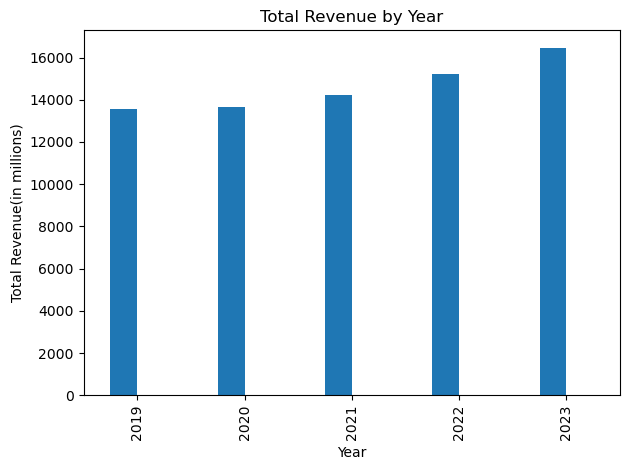

In [160]:
#Bar graph to show yearly change in Revenue in five years

graph3_ak_rev = total_df_ak_rev.plot(kind="bar", legend=False)

# Set plot title and labels
plt.title("Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue(in millions)")
plt.tight_layout()

#Saving the image in the output folder
plt.savefig('output/Category Analysis/total_revenue(in millions)_vs_year_plot.png')
plt.show()

In [161]:
##Calculating the percentage share yearwise,for each category
##This code has been modified from a similar code from google

#Define dataframe to hold the percentage values
percent_df_ak_rev = pd.DataFrame() 

#Converting the first coloumn to numeric for calculation purpose
index_as_int_rev = total_df_ak_rev.index.astype(int)

#Iterting through the years
for year in years:
        percent_df_ak_rev[f"{year}"] = round(
            (merged_df_ak_final_rev[f"Revenue {year}(millions)"] / total_df_ak_rev.iloc[int(year) - index_as_int_rev.min(), total_df_ak_rev.columns.get_loc('Total Revenue(millions)')]) * 100, 2
        )

# Add 'Category Name' to the DataFrame at the beginning
percent_df_ak_rev.insert(0, 'Category Name', merged_df_ak_final_rev['Category Name'])

percent_df_ak_rev

,Category Name,2019,2020,2021,2022,2023
6,Sundry and Other Revenues,54.03,55.81,54.38,52.72,52.70
5,Provincial Subsidies,17.92,16.39,27.09,24.99,20.39
8,User Fees & Donations,17.59,17.91,11.44,12.96,13.60
0,Contribution From Reserves/Reserve Funds,4.00,3.83,3.71,4.02,4.41
1,Federal Subsidies,1.58,1.84,2.03,1.89,5.56
7,Transfers From Capital,1.53,2.04,1.35,1.36,1.40
2,Inter-Divisional Recoveries,2.33,1.15,0.00,2.05,1.94
3,Licences & Permits Revenue,1.03,1.04,0.00,0.00,0.00


In [162]:
#Highest Revenue Category for each year

#Create empty list to hold dataframe for each year highest revenue category
max_values_ak_rev = []
category_names_ak_rev_max = []

#Iterating through years
for year in years:
    max_value_ak_rev = merged_df_ak_final_rev[f"Revenue {year}(millions)"].max()
    category_name_ak_rev_max = merged_df_ak_final_rev.loc[merged_df_ak_final_rev[f"Revenue {year}(millions)"].idxmax(), "Category Name"]
    
    max_values_ak_rev.append(max_value_ak_rev)
    category_names_ak_rev_max.append(category_name_ak_rev_max)

#creating dataframe
high_df_ak_rev = pd.DataFrame({
    "Year": years,
    "Highest Category": category_names_ak_rev_max,
    "Revenue Amount": max_values_ak_rev
})

# Since the highest revenue category is same
#Calculating percentage change by each category through each year
high_df_ak_rev["Percentage Change"] = round(high_df_ak_rev["Revenue Amount"].pct_change() * 100,2)
high_df_ak_rev

,Year,Highest Category,Revenue Amount,Percentage Change
0,2019,Sundry and Other Revenues,7322.78,NaN
1,2020,Sundry and Other Revenues,7630.29,4.20
2,2021,Sundry and Other Revenues,7724.64,1.24
3,2022,Sundry and Other Revenues,8029.16,3.94
4,2023,Sundry and Other Revenues,8679.28,8.10


In [163]:
#Lowest Revenue Category for each year

#Filtering the value which are NaN or 0
filtered_df_ak_rev = merged_df_ak_final_rev.copy()
filtered_df_ak_rev.replace(0, np.nan, inplace=True)

#Create empty list to hold dataframe for each year lowest revenue category
min_values_ak_rev = []
category_names_ak_rev_min = []

#Iterating through years
for year in years:
    min_value_ak_rev = filtered_df_ak_rev[f"Revenue {year}(millions)"].min()
    category_name_ak_rev_min = filtered_df_ak_rev.loc[filtered_df_ak_rev[f"Revenue {year}(millions)"].idxmin(), "Category Name"]

    min_values_ak_rev.append(min_value_ak_rev)
    category_names_ak_rev_min.append(category_name_ak_rev_min)

#creating dataframe
low_df_ak_rev = pd.DataFrame({
    "Year": years,
    "Lowest Category": category_names_ak_rev_min,
    "Revenue Amount": min_values_ak_rev
})
low_df_ak_rev

,Year,Lowest Category,Revenue Amount
0,2019,Licences & Permits Revenue,138.99
1,2020,Licences & Permits Revenue,141.64
2,2021,Transfers From Capital,192.35
3,2022,Transfers From Capital,207.19
4,2023,Transfers From Capital,229.77


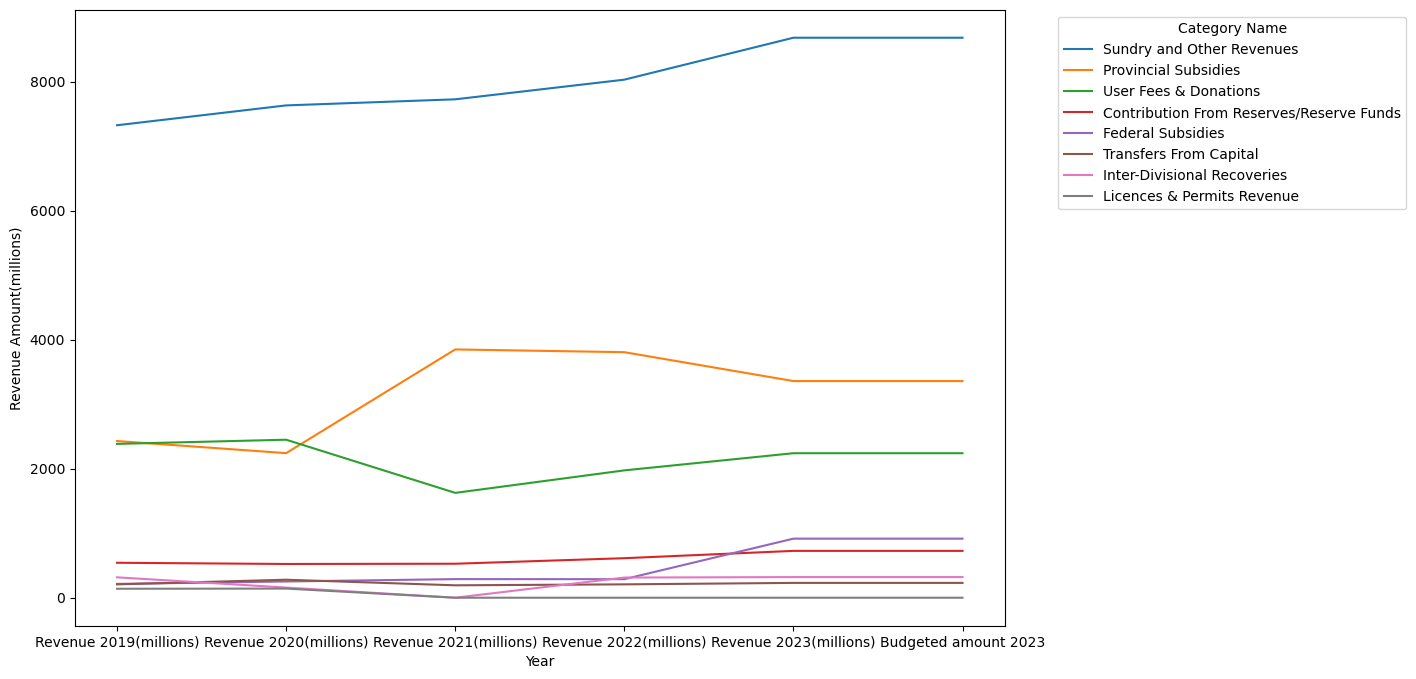

In [164]:
##Time series data of expense amount over the years for different categories

time_series_data_rev = merged_df_ak_final_rev.set_index('Category Name').T
time_series_data_rev.plot(figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Revenue Amount(millions)')
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('output/Category Analysis/time_series_data_for_revenue_five_years.png')
plt.show()


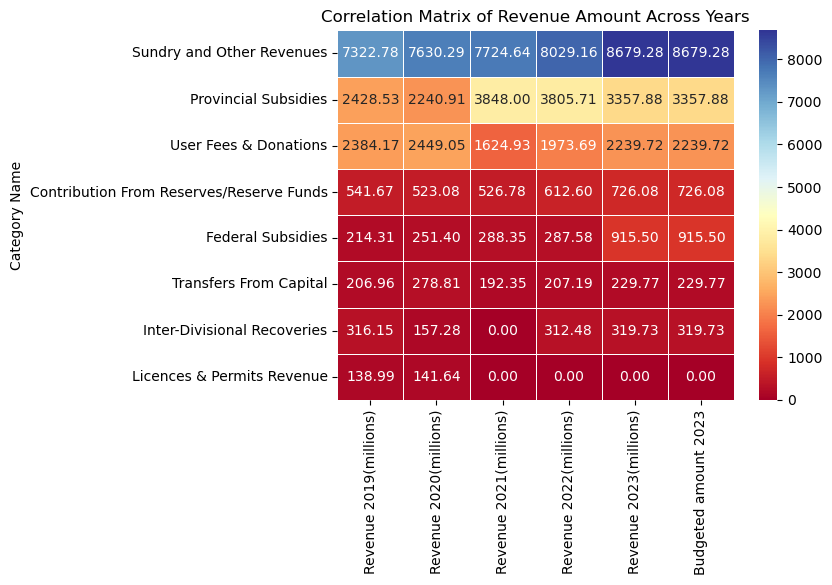

In [165]:
##Realtionship between "Years" and "Revenue Amount Categories" using seaborn heatmap

merged_df_ak_final_rev_heat=merged_df_ak_final_rev.set_index("Category Name")

# Plot heatmap
sns.heatmap(merged_df_ak_final_rev_heat, annot=True,fmt=".2f", cmap='RdYlBu', linewidths=.5)
plt.title("Correlation Matrix of Revenue Amount Across Years")

plt.savefig('output/Category Analysis/Correlation_matrix_Revenue_Amount .png')
plt.show()

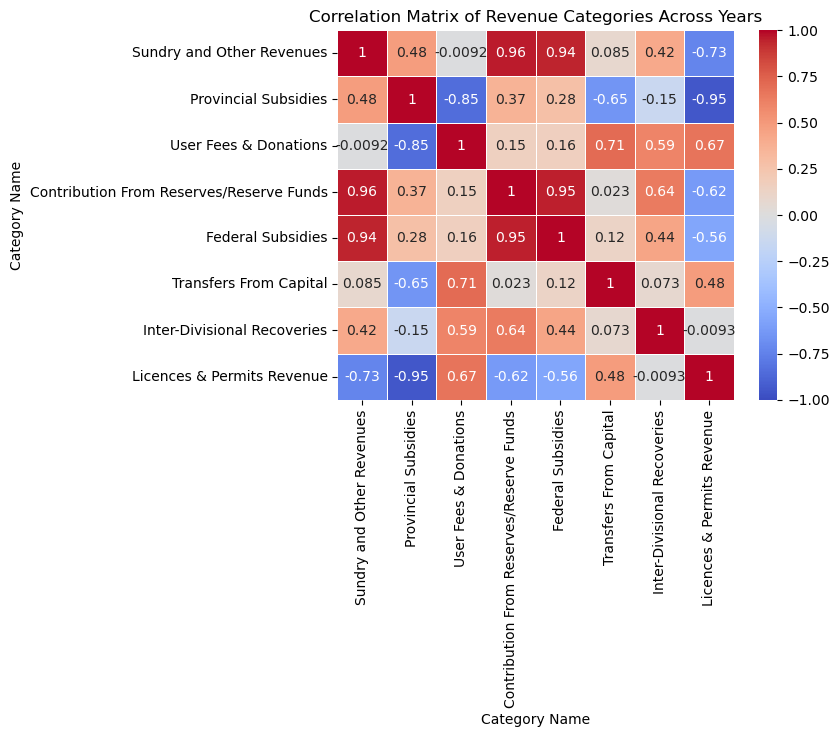

In [166]:
#Correlation matrix of budget categories across different years using Seaborn

# Transpose the DataFrame so that categories are rows and years are columns
transposed_df_rev = merged_df_ak_final_rev.set_index('Category Name').T

# Calculate the correlation matrix
correlation_matrix_rev_2 = transposed_df_rev.corr()

# Plot heatmap
sns.heatmap(correlation_matrix_rev_2, annot=True, cmap='coolwarm', linewidths=.5,vmin=-1,vmax=1)
plt.title("Correlation Matrix of Revenue Categories Across Years")

plt.savefig('output/Category Analysis/Correlation_matrix_Categories.png')
plt.show()

# Analysing Revenue-Sub Categories

In [167]:
# Function to calculate max, min, and sorted DataFrames for a given year

def process_year_rev(budget_df_rev, year):
        sub_ak_rev = budget_df_rev.groupby(["Category Name", "Sub-Category Name"])[f"Budgeted amount {year}"].sum().reset_index()
        max_row_ak_rev = sub_ak_rev.loc[sub_ak_rev[f"Budgeted amount {year}"].idxmax()]
        min_row_ak_rev = sub_ak_rev.loc[sub_ak_rev[f"Budgeted amount {year}"].idxmin()]
        sort_ak_rev = sub_ak_rev.sort_values(f"Budgeted amount {year}", ascending=False)

    # Divide the 'Budgeted amount' columns by 10^6 and round to two decimal places
        sub_ak_rev[f"Budgeted amount {year}"] = round(sub_ak_rev[f"Budgeted amount {year}"] / 1e6, 2)
        max_row_ak_rev[f"Budgeted amount {year}"] = round(max_row_ak_rev[f"Budgeted amount {year}"] / 1e6, 2)
        min_row_ak_rev[f"Budgeted amount {year}"] = round(min_row_ak_rev[f"Budgeted amount {year}"] / 1e6, 2)
        sort_ak_rev[f"Budgeted amount {year}"] = round(sort_ak_rev[f"Budgeted amount {year}"] / 1e6, 2)

    # Store the results in a dictionary
        results = {
            f"max_row_ak_{year}_rev": max_row_ak_rev,
            f"min_row_ak_{year}_rev": min_row_ak_rev,
            f"sort_ak_{year}_rev": sort_ak_rev
                    }

        return results

# Process each year
for year in years:
    # Assuming budget{year}_df_rev is the DataFrame for the corresponding year
    year_results = process_year_rev(globals()[f"budget{year}_df_rev"], year)

    # Print results for each year
    print(f"Year {year}: Maximum Revenue in Sub-Category along with Category Name and Revenue Amount(in Millions CAD)")
    print(year_results[f"max_row_ak_{year}_rev"])
    print("--------------------------------------------------------------------------------------")

    print(f"Year {year}: Minimum Revenue in Sub-Category along with Category Name and Revenue Amount (in Millions CAD)")
    print(year_results[f"min_row_ak_{year}_rev"])
    print("--------------------------------------------------------------------------------------")

Year 2019: Maximum Revenue in Sub-Category along with Category Name and Revenue Amount(in Millions CAD)
Category Name           Sundry and Other Revenues
Sub-Category Name                        Taxation
Budgeted amount 2019                      6499.25
Name: 10, dtype: object
--------------------------------------------------------------------------------------
Year 2019: Minimum Revenue in Sub-Category along with Category Name and Revenue Amount (in Millions CAD)
Category Name           User Fees & Donations
Sub-Category Name                   Donations
Budgeted amount 2019                     3.33
Name: 12, dtype: object
--------------------------------------------------------------------------------------
Year 2020: Maximum Revenue in Sub-Category along with Category Name and Revenue Amount(in Millions CAD)
Category Name           Sundry and Other Revenues
Sub-Category Name                        Taxation
Budgeted amount 2020                      6778.11
Name: 10, dtype: object
---

/var/folders/q3/539172213gv_lsmm8nv750l00000gn/T/ipykernel_28030/3244259558.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_row_ak_rev[f"Budgeted amount {year}"] = round(max_row_ak_rev[f"Budgeted amount {year}"] / 1e6, 2)
/var/folders/q3/539172213gv_lsmm8nv750l00000gn/T/ipykernel_28030/3244259558.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_row_ak_rev[f"Budgeted amount {year}"] = round(min_row_ak_rev[f"Budgeted amount {year}"] / 1e6, 2)
/var/folders/q3/539172213gv_lsmm8nv750l00000gn/T/ipykernel_28030/3244259558.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

# Gap Analysis

In [168]:
#There are sub-categories with "Gapping"  
#understanding those, since these were the adjustments made, which has no accounting significance

# Calculating year-wise total gap amount

gap_2019 = budget2019_df_exp.loc[(budget2019_df_exp["Sub-Category Name"] == "Gapping"), :]
gap_2019_ak = round(gap_2019["Budgeted amount 2019"].sum()/10e6, 4)

gap_2020 = budget2020_df_exp.loc[(budget2020_df_exp["Sub-Category Name"] == "Gapping"), :]
gap_2020_ak = round(gap_2020["Budgeted amount 2020"].sum()/10e6, 4)

gap_2021 = budget2021_df_exp.loc[(budget2021_df_exp["Sub-Category Name"] == "Gapping"), :]
gap_2021_ak = round(gap_2021["Budgeted amount 2021"].sum()/10e6, 4)

gap_2022 = budget2022_df_exp.loc[(budget2022_df_exp["Sub-Category Name"] == "Gapping"), :]
gap_2022_ak = round(gap_2022["Budgeted amount 2022"].sum()/10e6, 4)

gap_2023 = budget2023_df_exp.loc[(budget2023_df_exp["Sub-Category Name"] == "Gapping"), :]
gap_2023_ak = round(gap_2023["Budgeted amount 2023"].sum()/10e6, 4)

# Creating a DataFrame with year and amount
gap_ak_df = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Amount": [gap_2019_ak, gap_2020_ak, gap_2021_ak, gap_2022_ak, gap_2023_ak],
})

gap_ak_df




,Year,Amount
0,2019,-19.57
1,2020,0.00
2,2021,0.00
3,2022,-0.00
4,2023,-0.03


# Calculating the total gain or loss for five years (2019-2023)

In [169]:
# Calculating the expense and revenue 
df_merged_ak_rev = total_df_ak_rev["Total Revenue(millions)"]
df_merged_ak_exp = total_df_ak_exp["Total Expense(millions)"]
df_merged_ak = pd.merge(df_merged_ak_rev, df_merged_ak_exp, on='Year', how='outer')
df_merged_ak['Gain/Loss(millions)'] = df_merged_ak['Total Revenue(millions)'] - df_merged_ak['Total Expense(millions)']

# Set the display option for float format
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the result
df_merged_ak

,Total Revenue(millions),Total Expense(millions),Gain/Loss(millions)
Year,,,
2019,13553.56,13553.56,-0.00
2020,13672.46,13672.45,0.01
2021,14205.05,14205.07,-0.02
2022,15228.41,14225.06,1003.35
2023,16467.96,15431.14,1036.82
